In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the cleaned dataset
df = pd.read_csv('../data/cleaned.csv', parse_dates=['pickup_datetime'])
df.set_index('pickup_datetime', inplace=True)

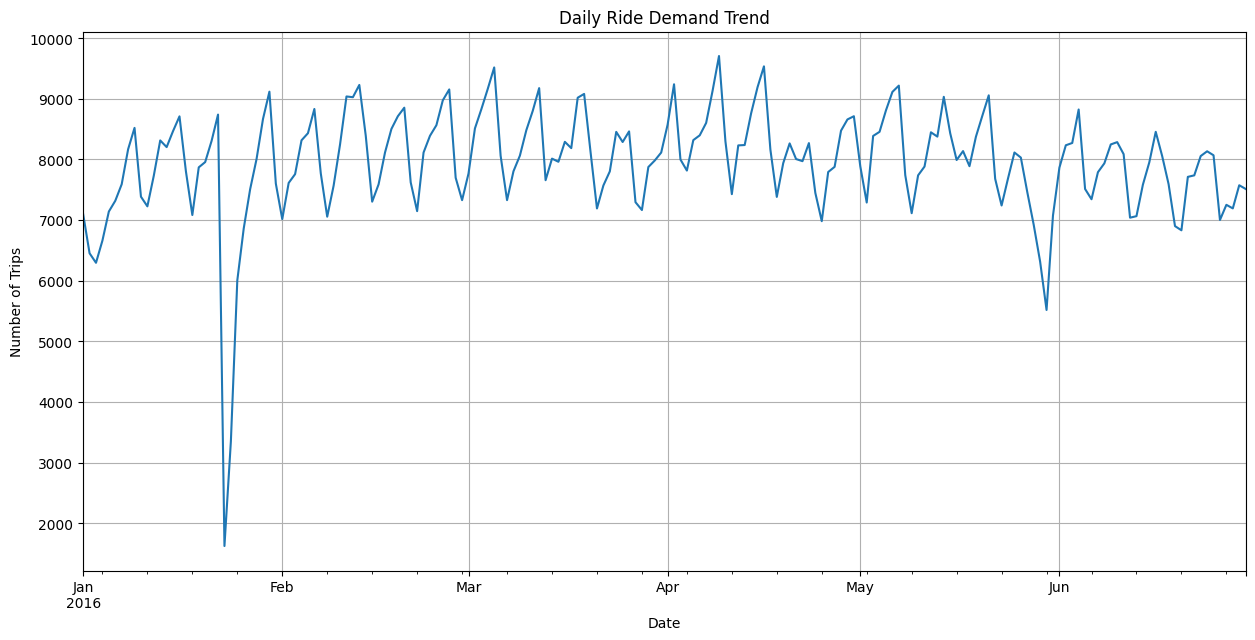

In [2]:
# 1. Daily Demand Trends
plt.figure(figsize=(15, 7))
df.resample('D').size().plot(grid=True)
plt.title('Daily Ride Demand Trend')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.show()

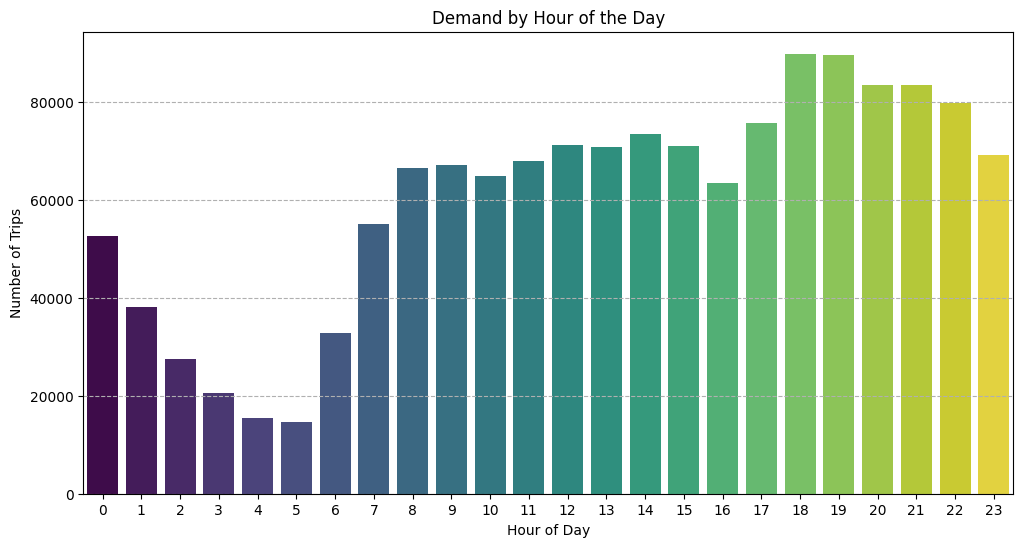

In [3]:
# 2. Peak Hours Analysis
plt.figure(figsize=(12, 6))
hourly_demand = df.index.hour.value_counts().sort_index()
sns.barplot(x=hourly_demand.index, y=hourly_demand.values, hue=hourly_demand.index, palette='viridis', legend=False)
plt.title('Demand by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--')
plt.show()

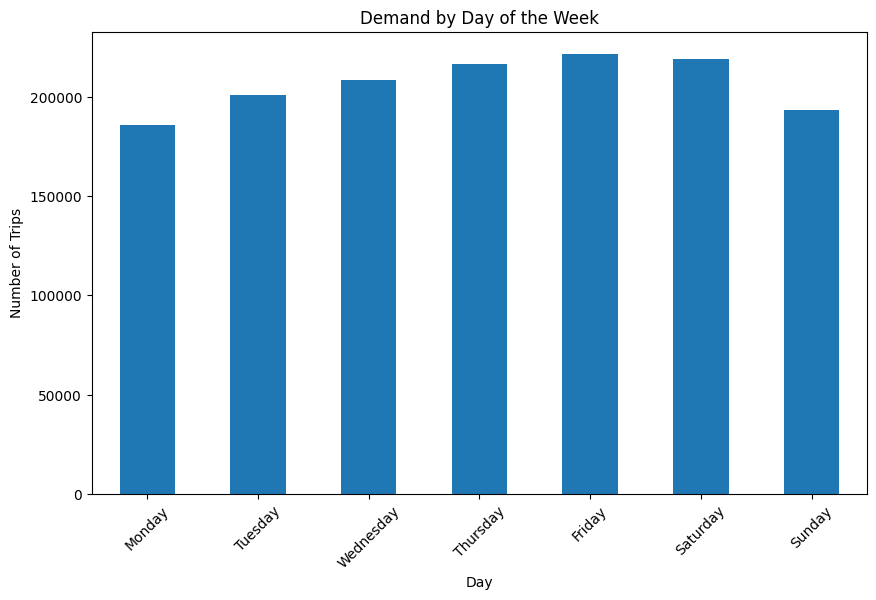

In [4]:
# 3. Weekday vs. Weekend Split
df['day_of_week'] = df.index.day_name()
weekday_demand = df.groupby('day_of_week').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 6))
weekday_demand.plot(kind='bar', rot=45)
plt.title('Demand by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Trips')
plt.show()

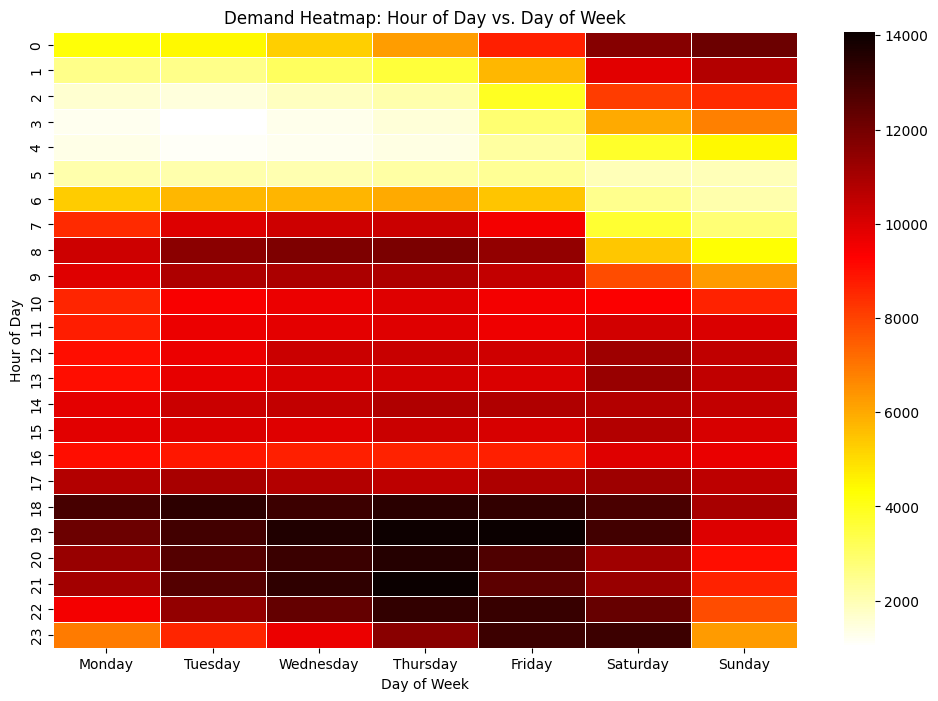

In [5]:
# 4. Demand Heatmap (Hour vs. Day of Week)
heatmap_data = df.groupby([df.index.hour, df.index.day_name()]).size().unstack().reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='hot_r', linecolor='white', linewidths=0.5)
plt.title('Demand Heatmap: Hour of Day vs. Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()

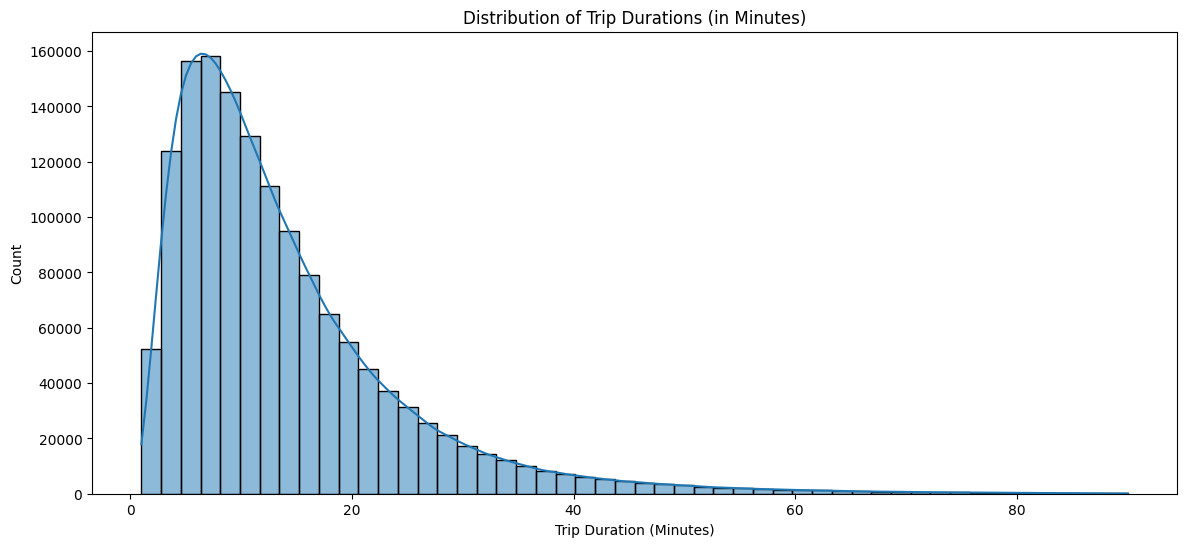

In [6]:
# 5. Trip Duration Analysis
plt.figure(figsize=(14, 6))
sns.histplot(df['trip_duration_minutes'], bins=50, kde=True)
plt.title('Distribution of Trip Durations (in Minutes)')
plt.xlabel('Trip Duration (Minutes)')
plt.show()

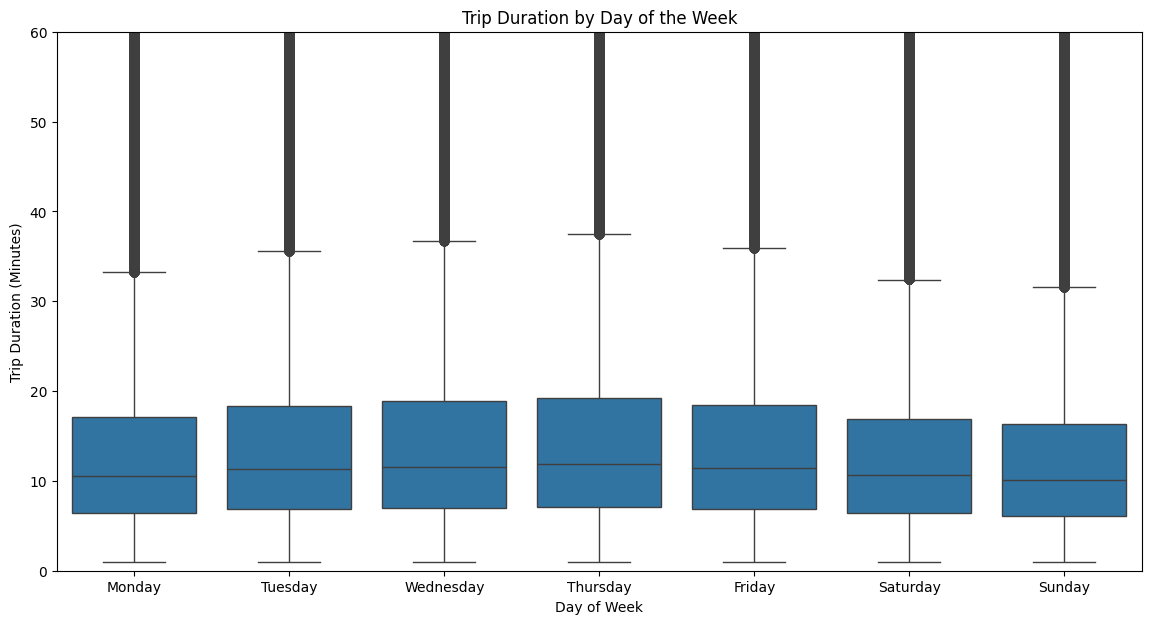

In [7]:
# 6. Box Plot of Trip Duration by Day of Week
plt.figure(figsize=(14, 7))

# Plot 'trip_duration_minutes'
sns.boxplot(data=df, x='day_of_week', y='trip_duration_minutes', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.title('Trip Duration by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Trip Duration (Minutes)')
plt.ylim(0, 60) 
plt.show()